In [1]:
# Lets read the data
import pandas as pd
from scipy import stats
video_count=pd.read_csv(r'D:\kiran\case study\AWS_Applied_Scientist_Challenge\research_scientist_problems\data\challenge_2\video_count.csv')
video_features=pd.read_csv(r'D:\kiran\case study\AWS_Applied_Scientist_Challenge\research_scientist_problems\data\challenge_2\video_features.csv')


In [2]:
#Lets analyse the video count data. 
video_count.describe()

,video_id,count
count,41775.000000,4.177500e+04
mean,1498.673250,6.243710e+05
std,864.094856,8.879097e+05
min,1.000000,1.000000e+00
25%,754.000000,9.095500e+03
50%,1492.000000,1.795580e+05
75%,2236.000000,9.043615e+05
max,3000.000000,6.070570e+06


In [3]:
video_count.drop_duplicates()

,video_id,count,date
0,2303,22,2015-01-07
1,1193,54854,2015-01-12
2,1219,1788779,2015-01-03
3,1472,234,2015-01-04
4,2947,14407,2015-01-08
5,1417,973996,2015-01-14
6,1564,42,2015-01-09
7,2962,278000,2015-01-03
8,2057,1134427,2015-01-05
9,1785,1059824,2015-01-09


In [4]:
#check the datatypes of the dataframe
video_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41775 entries, 0 to 41774
Data columns (total 3 columns):
video_id    41775 non-null int64
count       41775 non-null int64
date        41775 non-null object
dtypes: int64(2), object(1)
memory usage: 979.2+ KB


In [5]:
# Need to convert the date column to a datetime object
video_count['date']=pd.to_datetime(video_count['date'],format='%Y/%m/%d %H:%M:%S')

In [6]:
#check for any missing values
video_count.isnull().sum()
#No missing values in the data

video_id    0
count       0
date        0
dtype: int64

In [7]:
#merge videocount and video features
mergeddata=pd.merge(video_count,video_features,on='video_id')

In [8]:
mergeddata.columns

Index(['video_id', 'count', 'date', 'video_length', 'video_language',
       'video_upload_date', 'video_quality'],
      dtype='object')

In [9]:
mergeddata

,video_id,count,date,video_length,video_language,video_upload_date,video_quality
0,2303,22,2015-01-07,1071,Cn,2014-12-10,1080p
1,2303,21,2015-01-10,1071,Cn,2014-12-10,1080p
2,2303,22,2015-01-01,1071,Cn,2014-12-10,1080p
3,2303,21,2015-01-09,1071,Cn,2014-12-10,1080p
4,2303,22,2015-01-11,1071,Cn,2014-12-10,1080p
5,2303,21,2015-01-13,1071,Cn,2014-12-10,1080p
6,2303,22,2015-01-03,1071,Cn,2014-12-10,1080p
7,2303,23,2015-01-04,1071,Cn,2014-12-10,1080p
8,2303,20,2015-01-15,1071,Cn,2014-12-10,1080p
9,2303,21,2015-01-06,1071,Cn,2014-12-10,1080p


In [10]:
#calculate the mininum number of counts  We will ignore counts which are less than 10 percentile
m=mergeddata['count'].quantile(0.9)


In [11]:
m

2111429.9999999995

In [12]:
# so as a first filter,We will ignore counts which are less than 1 percentile,thereby we will defibe the hot videos and stable videos are the ones whoch have counts greater than m and views greater than v.So lets isolate the videos whoch are neither hot nor stable
othervideos=mergeddata[(mergeddata['count']<m)]

In [13]:
#For our analysis of hot videos and stable videos we will use only those whose counts are greater than 1 percentile
mergeddata=mergeddata[(mergeddata['count']>m)]


In [14]:
mergeddata

,video_id,count,date,video_length,video_language,video_upload_date,video_quality
31,1219,2394726,2015-01-10,904,Cn,2014-12-12,240p
32,1219,2198944,2015-01-09,904,Cn,2014-12-12,240p
33,1219,2340883,2015-01-12,904,Cn,2014-12-12,240p
34,1219,2123834,2015-01-06,904,Cn,2014-12-12,240p
35,1219,2474052,2015-01-11,904,Cn,2014-12-12,240p
36,1219,2324360,2015-01-14,904,Cn,2014-12-12,240p
38,1219,2278749,2015-01-07,904,Cn,2014-12-12,240p
41,1219,2483330,2015-01-13,904,Cn,2014-12-12,240p
43,1219,2342744,2015-01-15,904,Cn,2014-12-12,240p
128,2057,2603264,2015-01-01,964,Fr,2014-12-11,480p


#We Will need some metrics to do our classification and recommendations

In [15]:
#Get the total views for each video
import numpy as np
views=mergeddata.groupby("video_id")["count"].sum().reset_index()


In [16]:
views

,video_id,count
0,3,28239539
1,4,41105881
2,8,9017360
3,12,5095895
4,18,6513288
5,32,38203004
6,36,46340538
7,46,8841283
8,48,4307477
9,52,22724453


In [17]:
#Get the average length for each video
import numpy as np
length=mergeddata.groupby("video_id")["video_length"].median().reset_index()
length

,video_id,video_length
0,3,807
1,4,545
2,8,55
3,12,757
4,18,655
5,32,543
6,36,834
7,46,515
8,48,517
9,52,219


In [18]:
#Merging the metrics into a single dataset
summarydata=pd.merge(views,length,on='video_id')

In [19]:
summarydata.columns=['video_id','totalviews','averagelength']

In [20]:
video_count

,video_id,count,date
0,2303,22,2015-01-07
1,1193,54854,2015-01-12
2,1219,1788779,2015-01-03
3,1472,234,2015-01-04
4,2947,14407,2015-01-08
5,1417,973996,2015-01-14
6,1564,42,2015-01-09
7,2962,278000,2015-01-03
8,2057,1134427,2015-01-05
9,1785,1059824,2015-01-09


In [78]:
summarydata

,video_id,totalviews,averagelength
0,3,28239539,807
1,4,41105881,545
2,8,9017360,55
3,12,5095895,757
4,18,6513288,655
5,32,38203004,543
6,36,46340538,834
7,46,8841283,515
8,48,4307477,517
9,52,22724453,219


 We will define a metric called popularity index. We will define a video as popular if people tend to watch longer than others in other words popular video will be watched for a longer duration and  will have higher views .Combing the duration of video watched as well the count of people who watched the video, we will define popularity index as the Average length of the video multiplied by the total views it has got

popularity index of a given video=Average length of the video*total views for the video

In [21]:
def popindex(dataframe):
    return(dataframe['averagelength']*dataframe['totalviews'])

In [22]:
summarydata['popindex']=summarydata.apply(lambda x:popindex(x),axis=1)
summarydata['popindex']

0      22789307973
1      22402705145
2        495954800
3       3857592515
4       4266203640
5      20744231172
6      38648008692
7       4553260745
8       2226965609
9       4976655207
10      5923231990
11     24578454336
12       177825077
13     44263972335
14     11628525656
15     27333592992
16      4361975640
17     10295419436
18     29436981068
19      9200298496
20     41476774250
21      7323704056
22      9734923600
23      7658520672
24     45594073308
25      5452547499
26     37460569150
27       752331620
28     19325410596
29     67588315522
          ...     
389    48909538944
390     6644363572
391     2322253232
392     8586642464
393    35474190570
394    19587415575
395     1064066520
396     1824135698
397    11406914955
398    22162756001
399      716784867
400    16377821096
401     4788089670
402     1598149875
403    22721508342
404     2670657444
405    26529597780
406    22502236320
407     2029969320
408    20916172998
409      944929458
410    14752

In [23]:
#Normalizing the popularity index for easier interpretation
from statistics import mean 
from statistics import stdev
summarydata['popindex']=(summarydata['popindex']-mean(summarydata['popindex']))/(stdev(summarydata['popindex']))

we will use the popularity index to build a recommendation engine and also a classification

#Using the KPI popularity index as a means to classify our videos ,we will classify the video which have a popularity index greater than 1 to be "hot videos". This will account for the fact that videos which have high viewership count also high viewership length have generated high level of interest among users

In [24]:
summarydata['video_classify']=np.where(summarydata['popindex']>1,"Hot","Stable")

In [25]:
#Lets try to understand somemore features of the videos
finaldata=pd.merge(summarydata,video_features,on='video_id')

In [27]:
# The average video length and the video length column for each video id is same .so we can drop the average video length can be dropped
finaldata=finaldata.drop(['averagelength'],axis=1)


KeyError: "['averagelength'] not found in axis"

In [28]:
finaldata.groupby(["video_classify"])["totalviews"].describe().reset_index()

,video_classify,count,mean,std,min,25%,50%,75%,max
0,Hot,66.0,4.459266e+07,7.699242e+06,24765634.0,40307567.5,44054000.0,49089295.5,63178982.0
1,Stable,353.0,2.400221e+07,1.650862e+07,2119244.0,6571890.0,24309393.0,38960658.0,63165709.0


In [29]:
finaldata.groupby(["video_classify"])["video_length"].describe().reset_index()

,video_classify,count,mean,std,min,25%,50%,75%,max
0,Hot,66.0,901.696970,205.616893,482.0,749.5,848.0,1041.5,1366.0
1,Stable,353.0,515.994334,335.533632,9.0,262.0,489.0,671.0,1858.0


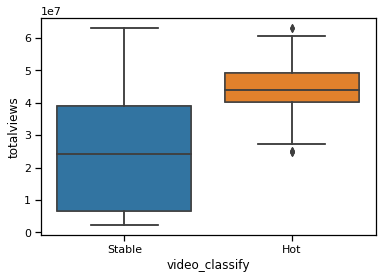

In [31]:
# We will need some plots to understand the features of videos classified as hot videos and stable videos
import seaborn as sns
sns.set_context('notebook')
sns.boxplot(finaldata['video_classify'],finaldata['totalviews'])
sns.boxplot(finaldata['video_classify'],finaldata['totalviews'])


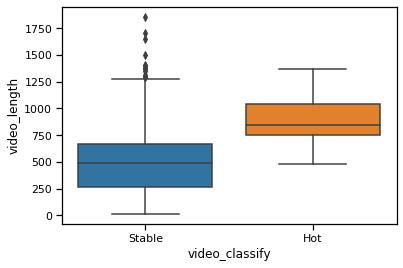

In [31]:
lm1=sns.boxplot(finaldata['video_classify'],finaldata['video_length'])



In [323]:
#sns.boxplot(finaldata['video_classify'],finaldata['counts'])
finaldata.columns

Index(['video_id', 'totalviews', 'popindex', 'video_classify', 'video_length',
       'video_language', 'video_upload_date', 'video_quality'],
      dtype='object')

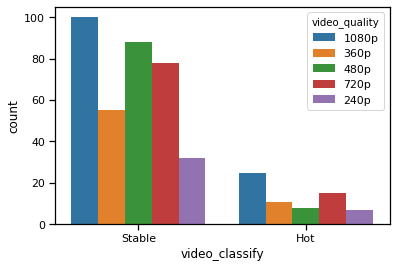

In [32]:
sns.countplot(x="video_classify",hue="video_quality" ,data=finaldata)


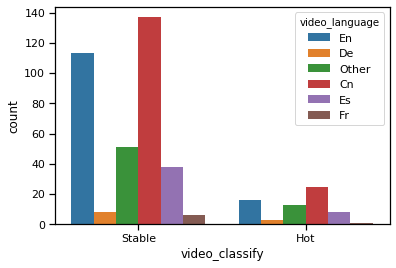

In [33]:
sns.countplot(x="video_classify",hue="video_language" ,data=finaldata)

In [440]:
# We will build a simple classification model to understand the features impacting our videos classification

In [92]:
import pandas_ml as pdml
#Since we have small number of samples for hot videos compared to stable videos we will have to balance the data using SMOTE

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
# We have to seperate the independent and dependent variables
features=pd.concat([finaldata.iloc[:,1:2],finaldata.iloc[:,4:6],finaldata.iloc[:,7]],axis=1)
target=finaldata['video_classify']
features=pd.get_dummies(features)



In [93]:
#checking the data balance of the target variables
target.value_counts()

Stable    353
Hot        66
Name: video_classify, dtype: int64

In [94]:
#Building the model using Random forest algorithm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(features.values,target.values)
#Using SMOTE to balance the data
X_trainres, y_trainres = sm.fit_sample(X_train, y_train)

#standardising the data before modelling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_trainres)
X_train=scaler.transform(X_trainres)


#Define the algorithm and training the model
rf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)

rf.fit(X_trainres,y_trainres)

#check the accuracy on train and test
print(rf.score(X_trainres,y_trainres))
print(rf.score(X_test,y_test))


0.9681647940074907
0.9333333333333333


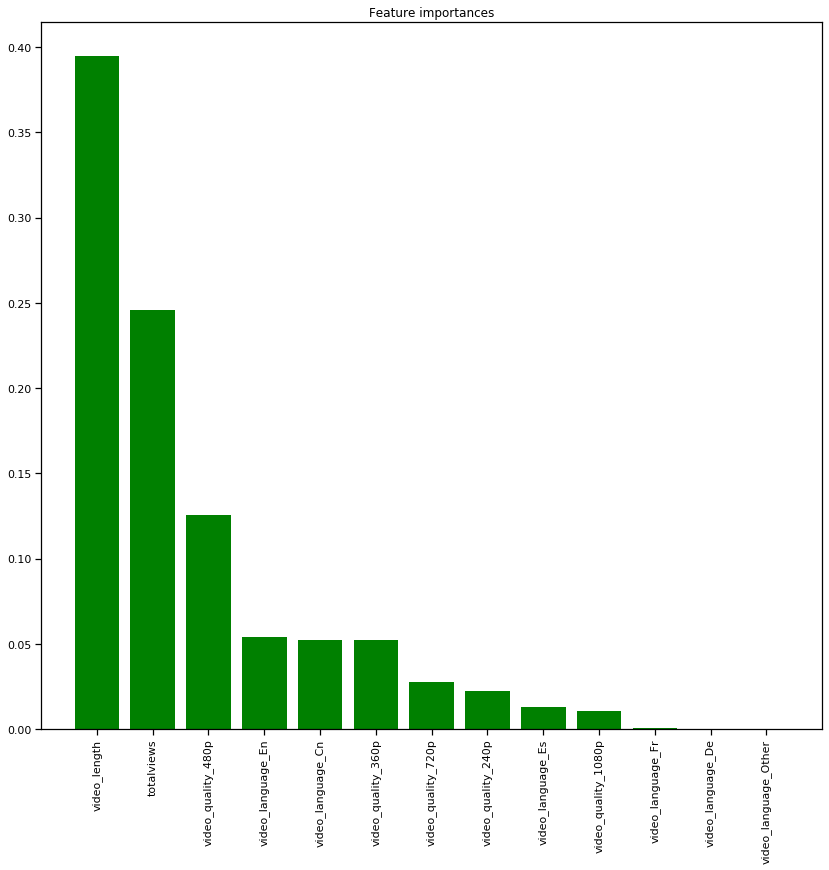

In [96]:
#Plot the feature importances in predicting the target variables
import matplotlib.pyplot as plt 
importances=rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="g",align="center")
plt.xticks(range(X_train.shape[1]), features.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


In [97]:
#Another algorithm to build the classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [98]:
#Running gradient boosting with multiple running rate to check accuracy
lrate = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for rate in lrate:
    gradient = GradientBoostingClassifier(n_estimators=20, learning_rate = rate, max_features=2, max_depth = 2, random_state = 0)
    gradient.fit(X_trainres, y_trainres)
    print("Learning rate: ", rate)
    print("Accuracy score (training): {}".format(gradient.score(X_trainres, y_trainres)))
    print("Accuracy score (validation): {}".format(gradient.score(X_test, y_test)))
    

Learning rate:  0.05
Accuracy score (training): 0.9176029962546817
Accuracy score (validation): 0.8666666666666667
Learning rate:  0.1
Accuracy score (training): 0.9382022471910112
Accuracy score (validation): 0.8666666666666667
Learning rate:  0.25
Accuracy score (training): 0.9625468164794008
Accuracy score (validation): 0.9238095238095239
Learning rate:  0.5
Accuracy score (training): 0.9850187265917603
Accuracy score (validation): 0.9428571428571428
Learning rate:  0.75
Accuracy score (training): 0.9906367041198502
Accuracy score (validation): 0.9333333333333333
Learning rate:  1
Accuracy score (training): 0.9925093632958801
Accuracy score (validation): 0.9142857142857143


In [99]:
#Choose learning rate of 0.5 which gives best results.
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_trainres,y_trainres)
predictions = gb.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print()
print(classification_report(y_test, predictions))
print("Accuracy score (training): {}".format(gb.score(X_trainres, y_trainres)))
print("Accuracy score (validation): {}".format(gb.score(X_test, y_test)))



Confusion Matrix:
[[15  4]
 [ 2 84]]

              precision    recall  f1-score   support

         Hot       0.88      0.79      0.83        19
      Stable       0.95      0.98      0.97        86

    accuracy                           0.94       105
   macro avg       0.92      0.88      0.90       105
weighted avg       0.94      0.94      0.94       105

Accuracy score (training): 0.9850187265917603
Accuracy score (validation): 0.9428571428571428


In [473]:
# We see the among random forest and gradient boosting we get best results on gradient boosting algorithm it is recommended to use gradient boosting to build the classifier for this dataset

In [ ]:
#Now that we have classified hot videos and stable videos we need to build a recommendation engine using the popularity index defined above

In [100]:
#Pivot the data and generate a sparse matrix to identify similarity between videos usingkneighbors
summarydata_pivot=summarydata.pivot(columns='video_id',values='popindex').fillna(0)

In [101]:
from scipy.sparse import *
from scipy import *

In [102]:
summarydatamatrix=csr_matrix(summarydata_pivot.values)

In [103]:
summarydatamatrix

<419x419 sparse matrix of type '<class 'numpy.float64'>'
	with 419 stored elements in Compressed Sparse Row format>

In [105]:
from sklearn.neighbors import NearestNeighbors

In [106]:
# We will define k neighbors to identify similar videos based on cosine similarities
model_knn=NearestNeighbors(metric='cosine',algorithm='brute')

In [107]:
model_knn.fit(summarydatamatrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [108]:
#Lets showcase a sample recommender for any videoid of our choice
choice=np.random.choice(summarydata_pivot.shape[0])

In [109]:
distances,indices=model_knn.kneighbors(summarydata_pivot.iloc[choice,:].values.reshape(1,-1),n_neighbors=5)

In [110]:
indices

array([[  9, 278, 281, 279, 282]], dtype=int64)

In [111]:
distances

array([[0., 1., 1., 1., 1.]])

In [112]:
distances=distances.flatten()

    

In [113]:
# Here we showcase recommendation for video id 8
for i in range(len(distances)-1):
    print("Recomendation no {0} for video_id {1} is video_id {2}".format(i+1,choice,summarydata_pivot.index[indices.flatten()[i+1]]))

Recomendation no 1 for video_id 9 is video_id 278
Recomendation no 2 for video_id 9 is video_id 281
Recomendation no 3 for video_id 9 is video_id 279
Recomendation no 4 for video_id 9 is video_id 282


We have built a simple recommendation engine based on its popularity index as shown above